## Introduction to Fixtures

### What is a fixture
- Fixture - a prepared environment that can be used for a test execution
- Fixture Setup - a process of preparing the environment and setting up resources that are required by one or more tests

Imagine preparation for a picnic:
1. Invite our friends and prepare the food (that's what fixtures do)
2. Have fun!
3. Clean up

### Why do we need fixture
Fixtures help:
- To make test setup easier
- To isolate the test of the environmental preparation
- To make the fixture code reusable

### Fixture example: overview
Assume we have:
- a Python `list` variable named `data`
- data = `[0, 1, 1, 2, 3, 5, 8, 13, 21]`

And we want to test, that:
- It contains 9 elements
- It contains the elements `5` and `21`

### Fixture example: code

In [ ]:
import pytest
# Fixture decorator
@pytest.fixture

# Fixture for data initialization
def data():
    return [0, 1, 1, 2, 3, 5, 8, 13, 21]

def test_list(data):
    assert len(data) == 9
    assert 5 in data
    assert 21 in data


### How to use fixtures
To use the fixture we have to do the following:
1. Prepare software and tests
2.  Find "environment preparation"
3.  Create a fixture:
    - Declare the `@pytest.fixture` decorator
    - Implement the fixture function
4. Use the created fixture:
    - Pass the fixture name to the test function
    - Run the tests!

In [ ]:
# Practice 1

# Import the pytest library
import pytest

# Define the fixture decorator
@pytest.fixture
# Name the fixture function
def prepare_data():
    return [i for i in range(10)]

# Create the tests
def test_elements(prepare_data):
    assert 9 in prepare_data
    assert 10 not in prepare_data

## Chain Fixtures Requests

### What is a chain request
- Chain fixtures requests - a pytest feature, that allows a fixture to use another fixture
- Creates a composition of fixtures
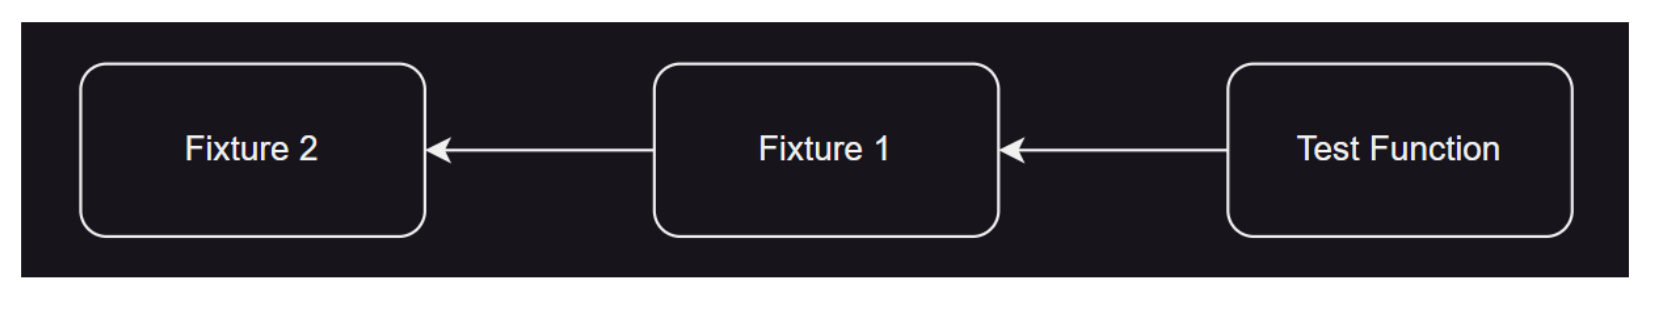

### Why and when to use
Chain fixtures requests help to:
- **Establish dependencies** between fixtures
- Keep the code **modular**

When it can be useful:
- When we have several fixtures that **depend on each other**

### Example of chain requests

In [ ]:
# Fixture that is requested by the other fixture
@pytest.fixture
def setup_data():
    return "I am a fixture!"

In [ ]:
# Fixture that is requested by the test function
@pytest.fixture
def process_data(setup_data):
    return setup_data.upper()

In [ ]:
# The test function
def test_process_data(process_data):
    assert process_data == "I AM A FIXTURE!"

### How to use chain requests
1. Prepare the program we want to test
2. Prepare the testing functions
3. Prepare the pytest fixtures
4. Pass the fixture name to the other fixture signature

In [ ]:
# Fixture requesting other fixture
@pytest.fixture
def process_data(setup_data):
    return setup_data.upper()

## Fixtures Autouse

### Autouse argument
- An optional boolean argument of a fixture
- Can be passed to the fixture decorator
- When `autouse=True` the fixture function is executing regardless of a request
- Helps to reduce the amount of redundant fixture calls

### When to use
In case we need to apply certain environment preparations or modifications **for all tests**.
For example, when we want to guarantee, that all tests:
- Have the same data
- Have the same connections (data, API, etc.)
- Have the same environment configuration
- Have a monitor, logging, or profiling

All such cases should be addressed with an **"autouse" argument**.

### Autouse example
Example of an "autoused" fixture:

In [ ]:
import pytest
import pandas as pd

# Autoused fixture
@pytest.fixture(autouse=True)
def set_pd_options():   
    pd.set_option('display.max_columns', 5000)

# Test function
def test_pd_options():
    assert pd.get_option('display.max_columns') == 5000

In [ ]:
# Correct Usage

import pytest
import pandas as pd

# Wrong autoused fixture
@pytest.fixture 
def correct_fixture():
    return [1,2,3,4,5]

# Test function
def test_type(correct_fixture):
    assert type(correct_fixture) == list

In [ ]:
# Practice 2

import pytest

@pytest.fixture
def init_list():
    return []

# Declare the fixture with autouse
@pytest.fixture(autouse=True)
def add_numbers_to_list(init_list):
    init_list.extend([i for i in range(10)])

# Complete the tests
def test_elements(init_list):
    assert 1 in init_list
    assert 9 in init_list

## Fixtures Teardown

### What is a fixture teardown
- **Fixture Teardown** - a process of cleaning up ("tearing down") resources that were allocated or created during the setup of a testing environment.

Recall the "picnic" analogy:
1. Invite our friends and prepare the food
2. Have fun!
3. Clean up - that's the teardown

### Why to use teardowns
It is important to **clean the environment** at the **end of a test**. If one does not use teardown, it can lead to significant issues:
- Memory leaks
- Low speed of execution and performance issues
- Invalid test results
- Pipeline failures and errors

### When to use
- Big objects
- More than one test
- Usage of autouse

When it is not necessary to use:
- One simple script with one test

### Lazy evaluation in Python
`yield` - is a Python keyword, which allows to create generators

In [ ]:
# Example of generator function
def lazy_increment(n):
    for i in range(n):
        yield i

f = lazy_increment(5)
next(f) # 0
next(f) # 1
next(f) # 2

### How to use:
- Replace `return` by `yield`
- Place the teardown code after `yield`
- Make sure that the setup code is only before `yield`

### Teardown example

In [ ]:
@pytest.fixture
def init_list():
    return []

@pytest.fixture(autouse=True)
def add_numbers_to_list(init_list):
    # Fixture Setup    
    init_list.extend([i for i in range(10)])
    # Fixture output
    yield init_list
    # Teardown statement 
    init_list.clear()
    
def test_9(init_list):
    assert 9 in init_list

In [ ]:
# Practice 3

import pytest

@pytest.fixture
def prepare_data():
    data = [i for i in range(10)]
    # Return the data with the special keyword
    yield data
    # Clear the data list
    data.clear()
    # Delete the data variable
    del data

def test_elements(prepare_data):
    assert 9 in prepare_data
    assert 10 not in prepare_data

In [ ]:
# Practice 4

import pytest
import pandas as pd

@pytest.fixture
def data():
    df = pd.read_csv('games.csv')
    # Return df with the special keyword
    yield df
    # Remove all rows in df
    df.drop(df.index, inplace=True)
    # Delete the df variable
    del df

def test_type(data):
    assert type(data) == pd.DataFrame

def test_shape(data):
    assert data.shape[0] == 1512